In [ ]:
"""Titanic - Machine Learning from Disaster."""
# Uploaded on kaggle in competition

'Titanic - Machine Learning from Disaster'

In [36]:
! pip install seaborn
! pip install pandas
! pip install numpy
! pip install scikit-learn


[notice] A new release of pip available: 22.3 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached scikit_learn-1.6.1-cp311-cp311-win_amd64.whl (11.1 MB)
     --------------------------------------- 41.2/41.2 MB 26.1 MB/s eta 0:00:00
  Using cached joblib-1.4.2-py3-none-any.whl (301 kB)



[notice] A new release of pip available: 22.3 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# import library
# fmt: off
import pandas as pd
# to build graphs we will use the new library seaborn
import seaborn as sns
# import logistic regression from sklearn's linear_model module
from sklearn.linear_model import LogisticRegression
# import accuracy metric
# build confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix
# import StandardScaler class
from sklearn.preprocessing import StandardScaler

# fmt: on
# read train data
train = pd.read_csv("/kaggle/input/titanic/train.csv")
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [ ]:
# read test data
test = pd.read_csv("/kaggle/input/titanic/test.csv")
test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


### Model building and forecasting

#### Step 1 Data processing and analysis

##### Exploratory Data Analysis (EDA)

In [39]:
# look at the data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: xlabel='Pclass', ylabel='count'>

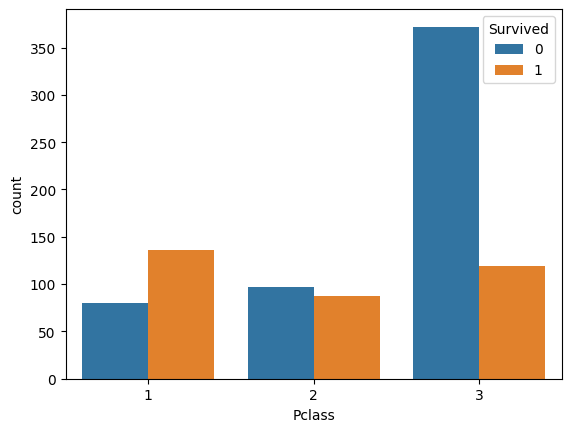

In [41]:
# let's see how important the ticket class is for the passenger's survival
# using x and hue we can fit two categorical variables on one graph
sns.countplot(x="Pclass", hue="Survived", data=train)

<Axes: xlabel='Sex', ylabel='count'>

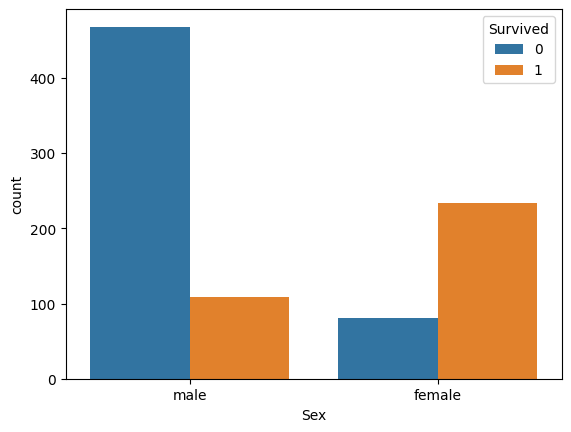

In [42]:
# who survived more often, men or women?
sns.countplot(x="Sex", hue="Survived", data=train)

Пропущенные значения

In [43]:
# identify missing values ​​using .isnull() and count them using sum()
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# the Cabin variable (cabin number) is probably not the most important
# let's get rid of it using the .drop() method
train.drop(columns="Cabin", axis=1, inplace=True)

In [ ]:
# but Age is more important, replace empty ​​with the arithmetic mean
train["Age"] = train["Age"].fillna(train["Age"].mean())

In [46]:
# we have two empty lines left in Embarked, let's delete them
train.dropna(inplace=True)

In [47]:
# let's see the result
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Категориальные переменные

In [48]:
# apply one-hot encoding to the variable Sex using the pd.get_dummies()
pd.get_dummies(train["Sex"]).head(3)

,female,male
0,False,True
1,True,False
2,True,False


In [ ]:
# download the Sex column from the train dataset again in dataframe format
previous = pd.read_csv("/kaggle/input/titanic/train.csv")[["Sex"]]
previous.head()

,Sex
0,male
1,female
2,female
3,female
4,male


In [50]:
# encode the variable using 0 and 1
pd.get_dummies(previous["Sex"], dtype=int).head(3)

,female,male
0,0,1
1,1,0
2,1,0


In [51]:
# remove the first column, it is redundant
sex = pd.get_dummies(train["Sex"], drop_first=True)
sex.head(3)

,male
0,True
1,False
2,False


In [52]:
# let's do the same for the Pclass and Embarked variables
embarked = pd.get_dummies(train["Embarked"], drop_first=True)
pclass = pd.get_dummies(train["Pclass"], drop_first=True)

In [53]:
# append variables encoded via one-hot encoding
# to the original dataframe via the .concat() function
train = pd.concat([train, pclass, sex, embarked], axis=1)
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,2,3,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,False,True,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,False,False,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False,True,False,False,True


Отбор признаков

In [ ]:
# delete those columns that we don't need anymore
field_to_drop = ["PassengerId", "Pclass", "Name", "Sex", "Ticket", "Embarked"]
train.drop(field_to_drop, axis=1, inplace=True)
train.head(3)

,Survived,Age,SibSp,Parch,Fare,2,3,male,Q,S
0,0,22.0,1,0,7.2500,False,True,True,False,True
1,1,38.0,1,0,71.2833,False,False,False,False,False
2,1,26.0,0,0,7.9250,False,True,False,False,True


Нормализация данных

In [55]:
# create an instance of this class
scaler = StandardScaler()

# select columns that we want to scale
cols_to_scale = ["Age", "Fare"]

# calculate mean and standard deviation for data scaling
scaler.fit(train[cols_to_scale])

# apply them
train[cols_to_scale] = scaler.transform(train[cols_to_scale])

# look at the result
train.head(3)

,Survived,Age,SibSp,Parch,Fare,2,3,male,Q,S
0,0,-0.590495,1,0,-0.500240,False,True,True,False,True
1,1,0.643971,1,0,0.788947,False,False,False,False,False
2,1,-0.281878,0,0,-0.486650,False,True,False,False,True


In [56]:
# some column names are now numbers, this shouldn't be the case
train.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 2, 3, 'male', 'Q', 'S'], dtype='object')

In [57]:
# convert these variables to str type using map() function
train.columns = train.columns.map(str)
train.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', '2', '3', 'male', 'Q',
       'S'],
      dtype='object')

#### Step 2 Splitting the training set into X_train and y_train

In [58]:
# put everything except the Survived column into X_train
X_train = train.drop("Survived", axis=1)

# the 'Survived' column will be our target variable (y_train)
y_train = train["Survived"]

In [59]:
X_train.head(3)

,Age,SibSp,Parch,Fare,2,3,male,Q,S
0,-0.590495,1,0,-0.500240,False,True,True,False,True
1,0.643971,1,0,0.788947,False,False,False,False,False
2,-0.281878,0,0,-0.486650,False,True,False,False,True


#### Step 3 Training the logistic regression model

##### Model learning

In [60]:
# create an instance of this class and store it in the model variable
model = LogisticRegression()

# train our model
model.fit(X_train, y_train)

LogisticRegression()

##### Make prediction on train data

In [61]:
y_pred_train = model.predict(X_train)

##### Estimation quality on test data

In [62]:
# pass actual and predicted values to it
conf_matrix = confusion_matrix(y_train, y_pred_train)

# convert to dataframe
conf_matrix_df = pd.DataFrame(conf_matrix)
conf_matrix_df

,0,1
0,479,70
1,103,237


In [63]:
conf_matrix_labels = pd.DataFrame(
    conf_matrix,
    columns=["Прогноз погиб", "Прогноз выжил"],
    index=["Факт погиб", "Факт выжил"],
)
conf_matrix_labels

,Прогноз погиб,Прогноз выжил
Факт погиб,479,70
Факт выжил,103,237


In [64]:
# accuracy calculation
round((479 + 237) / (479 + 237 + 70 + 103), 3)

0.805

In [65]:
# pass actual and predicted values to it
model_accuracy = accuracy_score(y_train, y_pred_train)

# round to 3 decimal places
round(model_accuracy, 3)

0.805

##### Step 4 Plot test data for prediction

In [66]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [67]:
test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [68]:
# now we need to create a test set with the same features
# and first let's give the dataset a familiar name
X_test = test

In [69]:
# fill missing values in Age and Fare variables with mean values
X_test["Age"] = X_test["Age"].fillna(test["Age"].mean())
X_test["Fare"] = X_test["Fare"].fillna(test["Fare"].mean())

In [70]:
# perform one-hot encoding of categorical variables
sex = pd.get_dummies(X_test["Sex"], drop_first=True)
embarked = pd.get_dummies(X_test["Embarked"], drop_first=True)
pclass = pd.get_dummies(X_test["Pclass"], drop_first=True)

In [71]:
# join new columns to the original dataframe
X_test = pd.concat([test, pclass, sex, embarked], axis=1)

# and remove data that is no longer needed
X_test.drop(
    ["PassengerId", "Pclass", "Name", "Sex", "Cabin", "Ticket", "Embarked"],
    axis=1,
    inplace=True,
)

# look at the result
X_test.head(3)

,Age,SibSp,Parch,Fare,2,3,male,Q,S
0,34.5,0,0,7.8292,False,True,True,True,False
1,47.0,1,0,7.0000,False,True,False,False,True
2,62.0,0,0,9.6875,True,False,True,True,False


In [72]:
# apply mean and standard deviation from training data to scale test data
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])
X_test.head(3)

,Age,SibSp,Parch,Fare,2,3,male,Q,S
0,0.373932,0,0,-0.488579,False,True,True,True,False
1,1.338358,1,0,-0.505273,False,True,False,False,True
2,2.495670,0,0,-0.451165,True,False,True,True,False


In [73]:
X_test.columns = X_test.columns.map(str)

In [74]:
# make predictions on the test set
y_pred_test = model.predict(X_test)

In [75]:
# let's look at the first 10 predicted values
y_pred_test[:10]

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0])

##### Step 4 Save new file

In [77]:
ids = test["PassengerId"]


result = pd.DataFrame({"PassengerId": ids, "Survived": y_pred_test})

result.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [78]:
result.to_csv("result.csv", index=False)

print("File saved successfully!")

File saved successfully!
